<a href="https://colab.research.google.com/github/kathylsm25/CienciaDeDatosConPython/blob/main/Proyecto_No_4_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto No. 4
Por: Katherine Serrano
Curso: Ciencia de Datos con Python desde cero

In [6]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore
from pandas.core.indexes.numeric import Int64Index




# Notebook 1

REALIZAR:
❖ Desarrollar el modelo basado en la metodología CRISP-DM.
  ➢ Realizar el análisis exploratorio de datos (EDA) con la variable dependiente
(Target) e interpretar los hallazgos.
  ➢ Identificar las variables más importantes
  ➢ 1. Realizar análisis exploratorio de datos
  ➢ 2. Realizar la segmentación de clientes (creando la variable cualitativa de
segmentación).
  ➢ 3. Desarrollar 1 modelo incluyendo la variable de segmentación como variable
cualitativa o desarrollar 1 modelo dentro de cada segmento.
  ➢ Interpretaciòn, conclusiones y recomendaciones
❖ Enviar la solución en Python Notebook (documentado).
❖ Realizar una presentación en PPT y enviar el link en youtube de la sustentación de la solución. El equipo de sustentar el paso a paso y los resultados.
❖ Grupo: máximo 4 integrantes.

In [7]:
# Cargamos la Data desde Nuestra PC
from google.colab import files
files.upload()

Saving Siniestros - Siniestros.csv to Siniestros - Siniestros.csv


{'Siniestros - Siniestros.csv': b'Cliente_ID,Antig\xc3\xbcedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro\r\n185,44,1,604.86,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n238,79,1,1006.21,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n346,102,1,299.23,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n460,,1,645.19,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n549,109,,218,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n559,183,,10.32,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n666,172,0,3517.07,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n676,76,1,216.52,0,0,1,0,0,0,0,0,0,0,1,1,1,no\r\n696,136,0,1908.69,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n907,171,0,1895.19,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n974,93,1,1310.43,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1083,119,1,5085.55,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1186,9,,4871.7,0,0,0,0,0,1,0,0,0,0,0,0,0,no\r\n1196,17,1,193.4,0,0,0,0,0,0,0,0,0,0,0,0,0,no

In [8]:
# Cargamos los datos desde un archivo csv
df_siniestros = pd.read_csv('/content/Siniestros - Siniestros.csv', sep=',')
df_siniestros.head()

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,460,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,549,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no


In [9]:
# Varificamos si tenemos datos en blanco 
df_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           5800 non-null   int64  
 1   Antigüedad_Maxima    5213 non-null   float64
 2   Nivel_Ingresos       5527 non-null   float64
 3   Saldo_Pendiente      5800 non-null   float64
 4   Puntaje_Morosidad1   5800 non-null   int64  
 5   Puntaje_Morosidad2   5614 non-null   float64
 6   Puntaje_Morosidad3   5544 non-null   float64
 7   Puntaje_Morosidad4   5460 non-null   float64
 8   Puntaje_Morosidad5   5397 non-null   float64
 9   Puntaje_Morosidad6   5324 non-null   float64
 10  Saldo_Pendiente_Seg  5800 non-null   float64
 11  Siniestros1          5800 non-null   int64  
 12  Siniestros2          5800 non-null   int64  
 13  Siniestros3          5800 non-null   int64  
 14  Siniestros4          5800 non-null   int64  
 15  Siniestros5          5800 non-null   i

In [10]:
# Verificamos la cantidad de columnas vacías 
df_siniestros.isnull().sum()

Cliente_ID                0
Antigüedad_Maxima       587
Nivel_Ingresos          273
Saldo_Pendiente           0
Puntaje_Morosidad1        0
Puntaje_Morosidad2      186
Puntaje_Morosidad3      256
Puntaje_Morosidad4      340
Puntaje_Morosidad5      403
Puntaje_Morosidad6      476
Saldo_Pendiente_Seg       0
Siniestros1               0
Siniestros2               0
Siniestros3               0
Siniestros4               0
Siniestros5               0
Siniestros6               0
Estado_Siniestro       1068
dtype: int64

In [11]:
# Imputamos los valores faltantes de la columna "Antigüedad_Maxima" por la mediana
# Calcular la mediana de la variable "Antigüedad_Maxima"
mediana_Antigüedad_Maxima = df_siniestros['Antigüedad_Maxima'].median()

# Imputar los valores faltantes con la mediana
df_siniestros['Antigüedad_Maxima'].fillna(mediana_Antigüedad_Maxima, inplace=True)

In [12]:
# cambiamos el tipo de dato de la columna "Antiguedad Máxima" a int64
df_siniestros['Antigüedad_Maxima'] = df_siniestros['Antigüedad_Maxima'].astype(int)


In [13]:
# Imputamos los valores faltantes de la columna "Nivel_Ingresos" por la mediana
# Calcular la moda de la variable "Nivel_Ingresos"
mediana_Nivel_Ingresos = df_siniestros['Nivel_Ingresos'].median()

# Imputar los valores faltantes con la moda
df_siniestros['Nivel_Ingresos'].fillna(mediana_Nivel_Ingresos, inplace=True)

In [14]:
# Imputamos los valores faltantes de la columna "Estado_Siniestro" por la moda
# Calcular la moda de la variable "Estado_Siniestros"
moda_Estado_Siniestro = df_siniestros['Estado_Siniestro'].mode()[0]
#print(moda_Estado_Siniestro)

# Imputar los valores faltantes con la moda
df_siniestros['Estado_Siniestro'].fillna(moda_Estado_Siniestro, inplace=True)

In [15]:
# Imputamos los valores faltantes de la columna "Puntaje_Morosidad2" por la moda
# Calcular la mediana de la variable "Puntaje_Morosidad2"
mediana_Puntaje_Morosidad2 = df_siniestros['Puntaje_Morosidad2'].median()
#print(mediana_Puntaje_Morosidad2)

# Imputar los valores faltantes con la moda
df_siniestros['Puntaje_Morosidad2'].fillna(mediana_Puntaje_Morosidad2, inplace=True)

In [16]:
# Imputamos los valores faltantes de la columna "Puntaje_Morosidad3" por la moda
# Calcular la mediana de la variable "Puntaje_Morosidad3"
mediana_Puntaje_Morosidad3 = df_siniestros['Puntaje_Morosidad3'].median()
#print(mediana_Puntaje_Morosidad2)

# Imputar los valores faltantes con la moda
df_siniestros['Puntaje_Morosidad3'].fillna(mediana_Puntaje_Morosidad3, inplace=True)

In [17]:
# Imputamos los valores faltantes de la columna "Puntaje_Morosidad3" por la moda
# Calcular la mediana de la variable "Puntaje_Morosidad3"
mediana_Puntaje_Morosidad4 = df_siniestros['Puntaje_Morosidad4'].median()
#print(mediana_Puntaje_Morosidad4)

# Imputar los valores faltantes con la moda
df_siniestros['Puntaje_Morosidad4'].fillna(mediana_Puntaje_Morosidad4, inplace=True)

In [18]:
# Imputamos los valores faltantes de la columna "Puntaje_Morosidad5" por la moda
# Calcular la mediana de la variable "Puntaje_Morosidad3"
mediana_Puntaje_Morosidad5 = df_siniestros['Puntaje_Morosidad5'].median()
#print(mediana_Puntaje_Morosidad5)

# Imputar los valores faltantes con la moda
df_siniestros['Puntaje_Morosidad5'].fillna(mediana_Puntaje_Morosidad5, inplace=True)

In [19]:
# Imputamos los valores faltantes de la columna "Puntaje_Morosidad6" por la moda
# Calcular la mediana de la variable "Puntaje_Morosidad6"
mediana_Puntaje_Morosidad6 = df_siniestros['Puntaje_Morosidad6'].median()
#print(mediana_Puntaje_Morosidad6)

# Imputar los valores faltantes con la moda
df_siniestros['Puntaje_Morosidad6'].fillna(mediana_Puntaje_Morosidad6, inplace=True)

In [20]:
print(df_siniestros)

      Cliente_ID  Antigüedad_Maxima  Nivel_Ingresos  Saldo_Pendiente  \
0            185                 44             1.0           604.86   
1            238                 79             1.0          1006.21   
2            346                102             1.0           299.23   
3            460                 34             1.0           645.19   
4            549                109             1.0           218.00   
...          ...                ...             ...              ...   
5795      789697                 13             0.0             0.00   
5796      789964                  2             0.0          2196.94   
5797      790092                  4             2.0           805.72   
5798      790346                  0             1.0             0.01   
5799      790551                  4             0.0          1261.59   

      Puntaje_Morosidad1  Puntaje_Morosidad2  Puntaje_Morosidad3  \
0                      0                 0.0                 0.0   

In [ ]:
#Delete 'Puntaje_Morosidad2', 'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6' y 'siniestros' attributes
#df_siniestros.drop(['Puntaje_Morosidad2', 'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6'], axis = 1, inplace=True)

In [21]:
# Verificamos las imputaciones realizadas
df_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           5800 non-null   int64  
 1   Antigüedad_Maxima    5800 non-null   int64  
 2   Nivel_Ingresos       5800 non-null   float64
 3   Saldo_Pendiente      5800 non-null   float64
 4   Puntaje_Morosidad1   5800 non-null   int64  
 5   Puntaje_Morosidad2   5800 non-null   float64
 6   Puntaje_Morosidad3   5800 non-null   float64
 7   Puntaje_Morosidad4   5800 non-null   float64
 8   Puntaje_Morosidad5   5800 non-null   float64
 9   Puntaje_Morosidad6   5800 non-null   float64
 10  Saldo_Pendiente_Seg  5800 non-null   float64
 11  Siniestros1          5800 non-null   int64  
 12  Siniestros2          5800 non-null   int64  
 13  Siniestros3          5800 non-null   int64  
 14  Siniestros4          5800 non-null   int64  
 15  Siniestros5          5800 non-null   i

# Realizamos Estadistica Descriptiva

In [22]:
# Realizamos un resumen estadístico de las variables numéricas
print(df_siniestros.describe())

          Cliente_ID  Antigüedad_Maxima  Nivel_Ingresos  Saldo_Pendiente  \
count    5800.000000        5800.000000     5800.000000      5800.000000   
mean   396733.357414          48.243276        1.067931      3240.983681   
std    230285.889850          44.861054        1.130800      6157.722805   
min       185.000000           0.000000        0.000000         0.000000   
25%    195501.250000          14.000000        0.000000       329.747500   
50%    403865.000000          34.000000        1.000000      1100.315000   
75%    598317.750000          68.000000        1.000000      3265.322500   
max    790771.000000         255.000000        5.000000    124102.080000   

       Puntaje_Morosidad1  Puntaje_Morosidad2  Puntaje_Morosidad3  \
count         5800.000000         5800.000000         5800.000000   
mean             0.199310            0.235690            0.210517   
std              0.679003            0.877848            0.824897   
min              0.000000            0.

In [23]:
# Reemplazamos las variable cualitativa de interés a un estado binario de 1 si ha tenido siniestros y 0 si no ha tenido
df_siniestros['Estado_Siniestro'] = df_siniestros['Estado_Siniestro'].apply(lambda x: 0 if x == 'no' else 1)

In [24]:
# Realizamos un resumen estadístico de las variables numéricas
print(df_siniestros.describe())

          Cliente_ID  Antigüedad_Maxima  Nivel_Ingresos  Saldo_Pendiente  \
count    5800.000000        5800.000000     5800.000000      5800.000000   
mean   396733.357414          48.243276        1.067931      3240.983681   
std    230285.889850          44.861054        1.130800      6157.722805   
min       185.000000           0.000000        0.000000         0.000000   
25%    195501.250000          14.000000        0.000000       329.747500   
50%    403865.000000          34.000000        1.000000      1100.315000   
75%    598317.750000          68.000000        1.000000      3265.322500   
max    790771.000000         255.000000        5.000000    124102.080000   

       Puntaje_Morosidad1  Puntaje_Morosidad2  Puntaje_Morosidad3  \
count         5800.000000         5800.000000         5800.000000   
mean             0.199310            0.235690            0.210517   
std              0.679003            0.877848            0.824897   
min              0.000000            0.

In [25]:
# Creamos una nueva variable de segmentar a los clientes por su nivel de ingresos
def clasificar_Cliente(Nivel_Ingresos):
    if Nivel_Ingresos in (0,1):
        return "Bajo"
    elif Nivel_Ingresos in (2,3):
        return "Medio"
    else:
        return "Alto"

df_siniestros["Segmentación_Por_Ingresos"] = df_siniestros["Nivel_Ingresos"].apply(clasificar_Cliente)
print(df_siniestros.head())

   Cliente_ID  Antigüedad_Maxima  Nivel_Ingresos  Saldo_Pendiente  \
0         185                 44             1.0           604.86   
1         238                 79             1.0          1006.21   
2         346                102             1.0           299.23   
3         460                 34             1.0           645.19   
4         549                109             1.0           218.00   

   Puntaje_Morosidad1  Puntaje_Morosidad2  Puntaje_Morosidad3  \
0                   0                 0.0                 0.0   
1                   0                 0.0                 0.0   
2                   0                 0.0                 0.0   
3                   0                 0.0                 0.0   
4                   0                 0.0                 0.0   

   Puntaje_Morosidad4  Puntaje_Morosidad5  Puntaje_Morosidad6  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   

In [26]:
# Definir una función personalizada para convertir meses a años
def convertir_años(meses):
    return meses / 12

# Aplicar la función a la columna "Antigüedad_Maxima" y asignar el resultado a la nueva columna "Edad en Años"
df_siniestros['Antiguedad en Años'] = round(df_siniestros['Antigüedad_Maxima'].apply(convertir_años),0)

print(df_siniestros.head())

   Cliente_ID  Antigüedad_Maxima  Nivel_Ingresos  Saldo_Pendiente  \
0         185                 44             1.0           604.86   
1         238                 79             1.0          1006.21   
2         346                102             1.0           299.23   
3         460                 34             1.0           645.19   
4         549                109             1.0           218.00   

   Puntaje_Morosidad1  Puntaje_Morosidad2  Puntaje_Morosidad3  \
0                   0                 0.0                 0.0   
1                   0                 0.0                 0.0   
2                   0                 0.0                 0.0   
3                   0                 0.0                 0.0   
4                   0                 0.0                 0.0   

   Puntaje_Morosidad4  Puntaje_Morosidad5  Puntaje_Morosidad6  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   

# Entendimiento de los Datos

<ipython-input-43-341273bcdb9e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_siniestros.corr(),cmap='summer',annot=True,vmin=-1, vmax=1)


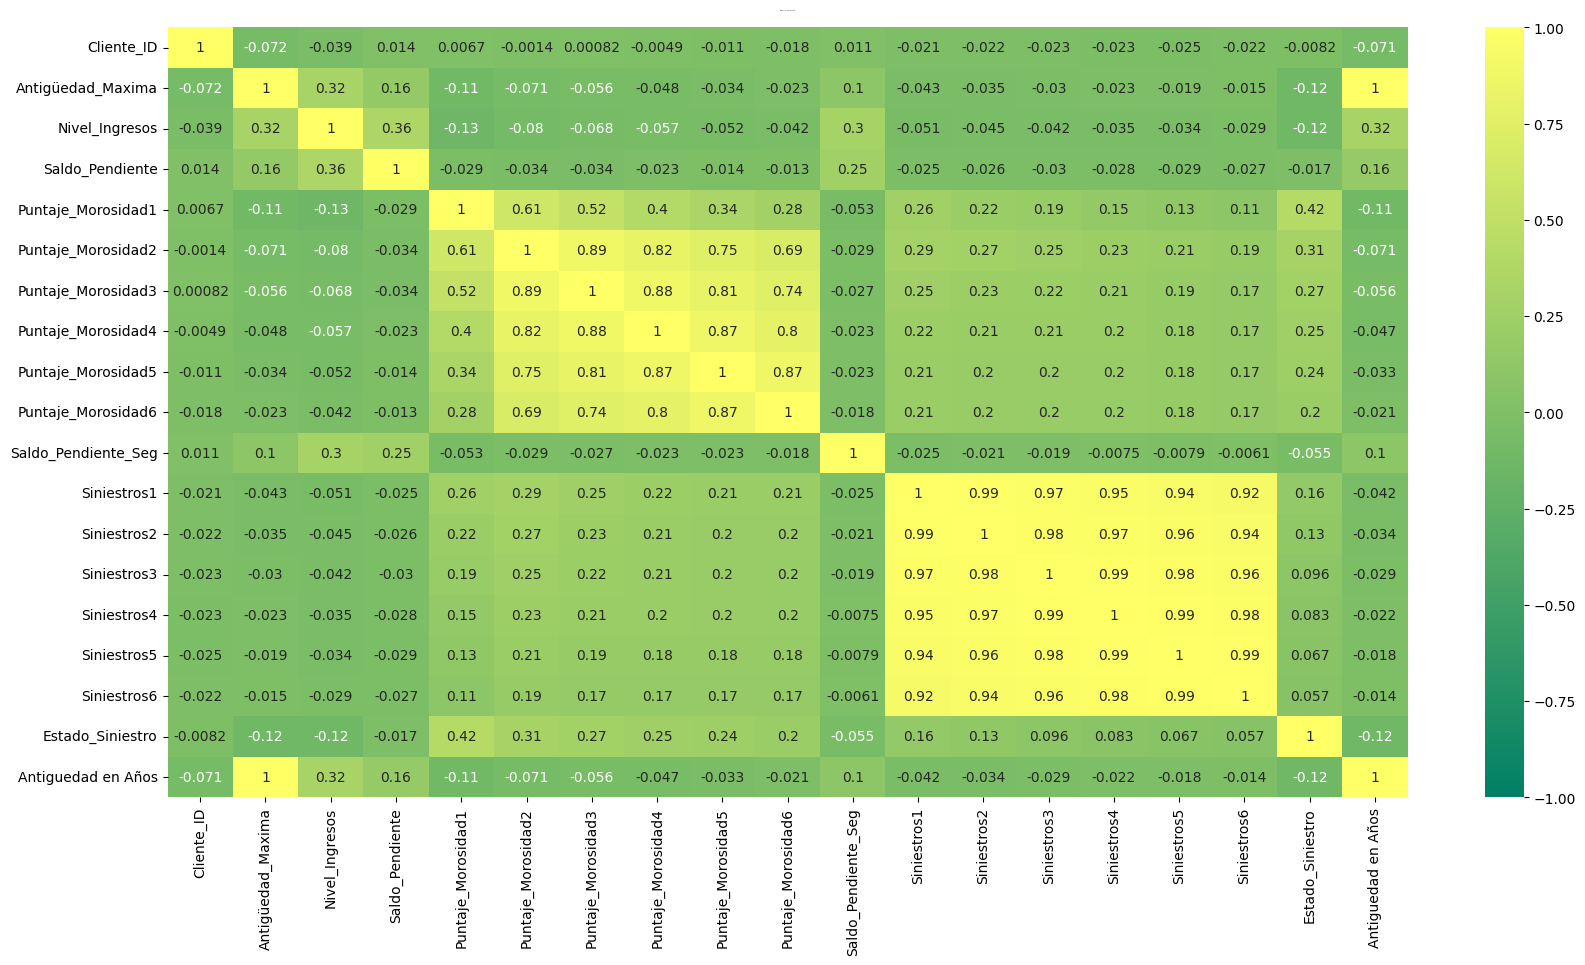

In [43]:
# Matriz de Correlación
# Matriz de correlación ( corregir)
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df_siniestros.corr(),cmap='summer',annot=True,vmin=-1, vmax=1)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12); 

<ipython-input-44-69694ff88f85>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_siniestros.corr()[['Estado_Siniestro']].sort_values(by='Estado_Siniestro', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


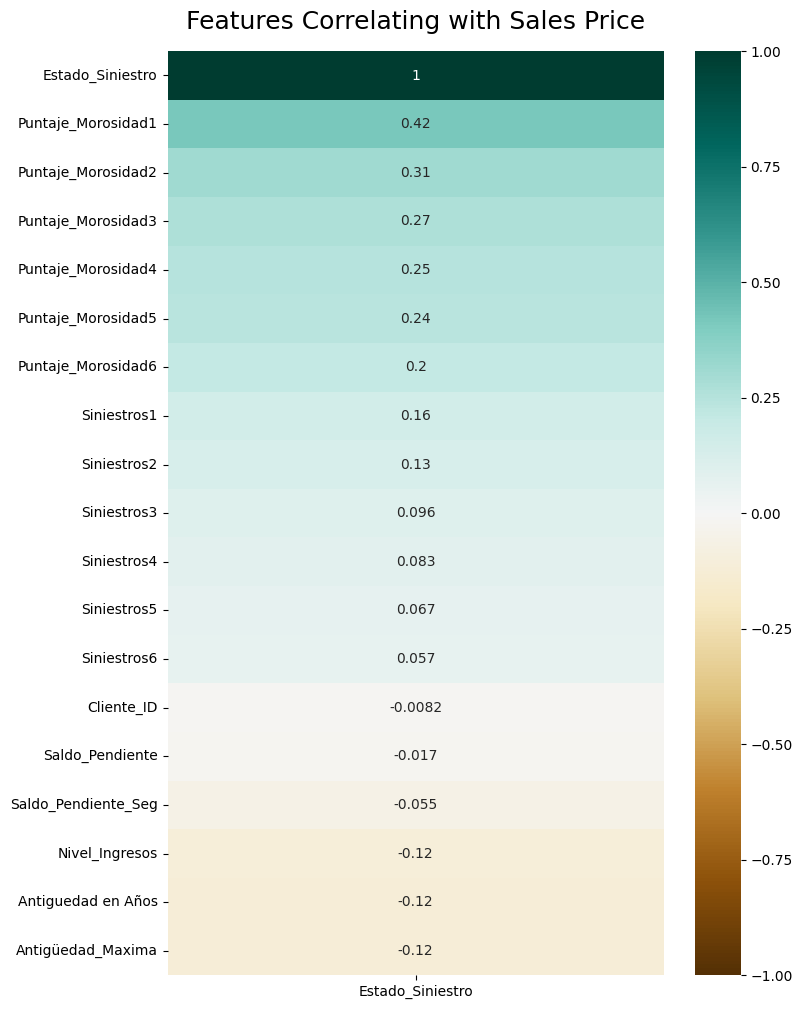

In [44]:
# Analizamos nuestra variable de interés

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_siniestros.corr()[['Estado_Siniestro']].sort_values(by='Estado_Siniestro', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Estado Siniestro', fontdict={'fontsize':18}, pad=16);

Este mapa de calor analizamos la correlación que existe en nuestra variable de estudio con las demás variables de nuestro Datframe donde observamos que existe una mayor correlación con las variables Puntaje de Morosidad sin embargo no es una correlación muy alta ya que la mayor está en 0.42



#Preparación de los datos
En este paso, vamos a preparar los datos para el modelado. Primero, vamos a dividir los datos en variables independientes y dependientes, y luego vamos a dividir los datos en conjuntos de entrenamiento y prueba.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleccionar variables independientes
X = df_siniestros[['Antigüedad_Maxima', 'Nivel_Ingresos', 'Saldo_Pendiente', 'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3','Puntaje_Morosidad4','Puntaje_Morosidad5','Puntaje_Morosidad6','Saldo_Pendiente_Seg','Siniestros1','Siniestros2','Siniestros3','Siniestros4','Siniestros5','Siniestros6']]

# Normalizar las variables independientes
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Seleccionar variable dependiente
y = df_siniestros['Estado_Siniestro']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

En este código, creamos un modelo de regresión logística utilizando la función LogisticRegression de scikit-learn. Entrenamos el modelo con los datos de entrenamiento y hacemos predicciones con los datos de prueba. Luego, calculamos la precisión del modelo utilizando la función accuracy_score y la matriz de confusión utilizando la función confusion_matrix.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Crear el modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los valores de siniestro
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:', conf_matrix)

Precisión: 0.9181034482758621
Matriz de confusión: [[1036   11]
 [  84   29]]


#Resultados

Precisión: 0.9181034482758621
La precisión es del 91.81%. Esto significa que el 91.81% de las predicciones realizadas por el modelo fueron correctas en términos de identificar correctamente los siniestros y los no siniestros.

Matriz de confusión:

Los resultados que ha proporcionado indican lo siguiente:
Matriz de confusión: [[1036   11]
 [  84   29]]

La matriz de confusión que has proporcionado tiene la siguiente estructura:



                    |   Predicción Negativa   |   Predicción Positiva   |
-----------------------------------------------------------------------
Valor Real Negativo  |   Verdadero Negativo   |   Falso Positivo       |
-----------------------------------------------------------------------
Valor Real Positivo  |   Falso Negativo       |   Verdadero Positivo   |


                    |   Predicción Negativa   |   Predicción Positiva   |
-----------------------------------------------------------------------
Valor Real Negativo |           1036          |   11                    |
-----------------------------------------------------------------------
Valor Real Positivo  |           84           |   29                    |


Verdadero Negativo (VN): 1036
Esto indica que el modelo ha predicho correctamente 1036 casos de no siniestros (clientes que no han tenido siniestros) como no siniestros.

Falso Positivo (FP): 11
El modelo ha predicho incorrectamente 11 casos de no siniestros como siniestros (clientes que no han tenido siniestros, pero el modelo los ha clasificado erróneamente como si los hubieran tenido).

Falso Negativo (FN): 84
El modelo ha predicho incorrectamente 84 casos de siniestros como no siniestros (clientes que han tenido siniestros, pero el modelo los ha clasificado erróneamente como si no los hubieran tenido).

Verdadero Positivo (VP): 29
Esto indica que el modelo ha predicho correctamente 29 casos de siniestros (clientes que han tenido siniestros) como siniestros.

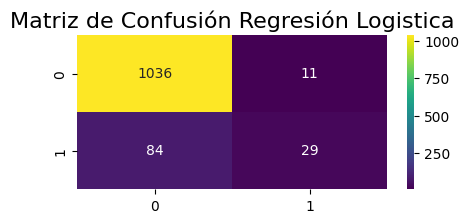

In [29]:
# Creamos una Matriz de COnfusión de Regresión Logística
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Regresión Logistica", fontsize=16)
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();

In [30]:
from sklearn.linear_model import LogisticRegression

# Llamamos al objeto
reg = LogisticRegression()

# Entrenamos al modelos
reg.fit(X_train,y_train)

# Haciendo predicciones
y_pred_reg=reg.predict(X_test)

In [31]:
# Validamos más nuestro modelo
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

acc_reg = accuracy_score(y_test, y_pred)
print("Classificación de Reporte:\n",classification_report(y_test,y_pred))

Classificación de Reporte:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1047
           1       0.72      0.26      0.38       113

    accuracy                           0.92      1160
   macro avg       0.82      0.62      0.67      1160
weighted avg       0.91      0.92      0.90      1160



In [32]:
# Aqui podemos indicar que descartamos las variables que nos den un p value mayor a 0.05
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
#log_clf = LogisticRegression()
log_clf_sm =sm.Logit(y_train,X_train)
classifier_sm = log_clf_sm.fit()

y_pred_sm = classifier_sm.predict(X_test)

print(classifier_sm.summary2())

Optimization terminated successfully.
         Current function value: 0.650341
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: -1.282   
Dependent Variable: Estado_Siniestro AIC:              6067.1648
Date:               2023-05-26 02:18 BIC:              6170.2443
No. Observations:   4640             Log-Likelihood:   -3017.6  
Df Model:           15               LL-Null:          -1322.1  
Df Residuals:       4624             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1       -0.0514     0.0325   -1.5800   0.1141   -0.1151    0.0123
x2       -0.0381     0.0348   -1.0963   0.2729   -0.1063    0.0300
x3 

#Ejecutamos Regresion Lineal para entrenar el modelo
reg.fit(x_train, y_train): Esta línea ajusta el modelo de regresión logística utilizando los datos de entrenamiento x_train y las etiquetas correspondientes y_train. El método fit() se utiliza para entrenar el modelo con los datos proporcionados.

y_pred_reg = reg.predict(x_test): Aquí se realizan predicciones utilizando el modelo entrenado en los datos de prueba x_test. El método predict() se utiliza para obtener las predicciones de las etiquetas de salida correspondientes a los datos de entrada proporcionados.

En resumen, este código crea y entrena un modelo de regresión logística utilizando LogisticRegression de scikit-learn, y luego realiza predicciones en los datos de prueba. Las predicciones se almacenan en y_pred_reg.

In [34]:
from sklearn.linear_model import LogisticRegression

# Llamamos al objeto
reg = LogisticRegression()

# Entrenamos al modelos
reg.fit(X_train,y_train)

# Haciendo predicciones
y_pred_reg=reg.predict(X_test)

In [35]:
# Reporte de Clasificación

from sklearn.metrics import classification_report

classification_report = classification_report(y_test, y_pred_reg)
print("Reporte de clasificación:")
print(classification_report)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1047
           1       0.72      0.26      0.38       113

    accuracy                           0.92      1160
   macro avg       0.82      0.62      0.67      1160
weighted avg       0.91      0.92      0.90      1160



Con esta salida vemos:
**Precision:** Es la proporción de verdaderos positivos entre todas las instancias que se predijeron como positivas. Para la clase 0, la precisión es 0.93, lo que indica que el 93% de las instancias clasificadas como clase 0 son realmente de esa clase. Para la clase 1, la precisión es 0.72, lo que indica que el 72% de las instancias clasificadas como clase 1 son realmente de esa clase.
**Accuracy (Exactitud):** Es la proporción de predicciones correctas en todas las instancias. En este caso, la exactitud es 0.92, lo que significa que el modelo clasificó correctamente el 92% de las instancias en los datos de prueba.

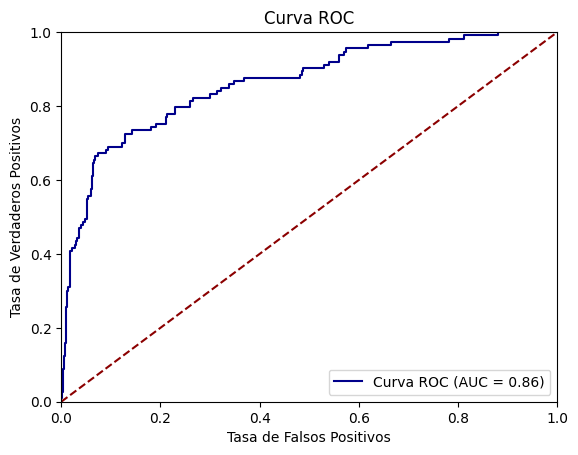

In [40]:
# Curva de ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción para las clases positivas
y_prob = reg.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkblue', label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkred', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

ROC podemos ver lo siguiente: **Área bajo la curva **(Area Under the Curve, AUC): Es una medida de la capacidad del modelo para distinguir entre clases positivas y negativas. El valor de AUC oscila entre 0 y 1, donde un valor de 1 indica un modelo perfecto y un valor de 0.5 indica un modelo que no tiene capacidad predictiva. Este AUC de 0.86 indica que el modelo tiene un buen poder o mejor rendimiento de discriminación y capacidad para distinguir entre las clases positivas y negativas. 

La línea azul en el gráfico representa la curva ROC, y la línea roja punteada indica la línea de referencia que representa un clasificador aleatorio.

Un AUC más alto indica un mejor rendimiento predictivo.

# Conclusiones
Consideramos que nuestro modelo tiene un buen porcentaje de predicción de los datos, utilizando regresión logística los resultados que nos ofrecen la matriz de confusión, el accuracy están arriba del 90%. Asi también la curva de ROC arroja un AUC del 0.86% un valor más cercado a 1 lo que indica que tiene un buen rendimiento de discriminación y capacidad para distinguir las clases positivas y negativas.